# Loading and Preprocessing Data with TensorFlow

On this session, we will learn about:


1. Data Pipeline
2. tensorflow.data
3. tensorflow_dataset



# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [ ]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
# import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# # Where to save the figures
# PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "data"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)

# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

# A. tensorflow.data.Dataset

Before raw data can be used to do some prediction or forecasting as the input to the model, normally the data have to go through some process. These series of process called Data Pipeline. A Data Pipeline is a set of actions that ingest raw data from disparate sources and move the data to a destination for storage and analysis. 

A data pipeline may be a simple process of data extraction and loading, or, it may be designed to handle data in a more advanced manner.

In order to do Data Pipeline in TensorFlow we can use module `tf.data`.

---

## Create Dataset from Tensor

To create an input pipeline, you must start with a data source. For example :
  * To construct a Dataset from data in memory : you can use `tf.data.Dataset.from_tensors()` or `tf.data.Dataset.from_tensor_slices()`. 
  * Alternatively, if your input data is stored in a file in the recommended TFRecord format, you can use `tf.data.TFRecordDataset()`. 

For this tutorial, let's create a Dataset from a tensor using `tf.data.Dataset.from_tensor_slices()`

In [ ]:
# Create A Dataset that consists of 10 Tensors

## Create a tensor
X = tf.range(10)

## Convert to Dataset type
dataset = tf.data.Dataset.from_tensor_slices(X)

## Let's check value of this dataset
print('X : ', X)
print('Dataset : ', dataset)
for x in dataset:
  print(x)

X :  tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
Dataset :  <TensorSliceDataset shapes: (), types: tf.int32>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


Equivalently:

In [ ]:
# Same Syntax to Create A Dataset that consists of 10 Tensors as Above
dataset = tf.data.Dataset.range(10)
dataset_copy = dataset

## Let's check value of this dataset
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


## Chaining Transformations

Once we have a dataset, we can apply all sorts of transformations to it by calling its transformation methods.

For further explore regarding methods in a dataset please check [tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset).

In [ ]:
# Let's Repeat and Batch Our Dataset
dataset = dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([8 9], shape=(2,), dtype=int64)


In [ ]:
# Get Each Item in Dataset as List
mylist = list(dataset.as_numpy_iterator())
print(mylist)

# Remove remainder in Dataset. Remainder is last row/tensor in our dataset.
mylist2 = list(dataset_copy.repeat(3).batch(7, drop_remainder=True).as_numpy_iterator())
print(mylist2)

[array([0, 1, 2, 3, 4, 5, 6]), array([7, 8, 9, 0, 1, 2, 3]), array([4, 5, 6, 7, 8, 9, 0]), array([1, 2, 3, 4, 5, 6, 7]), array([8, 9])]
[array([0, 1, 2, 3, 4, 5, 6]), array([7, 8, 9, 0, 1, 2, 3]), array([4, 5, 6, 7, 8, 9, 0]), array([1, 2, 3, 4, 5, 6, 7])]


---

We can also transform the items by calling the `map()` method.

In [ ]:
# Let's Increase Our Dataset's Value by Multiply It by 2
dataset = dataset.map(lambda x: x * 2)

for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int64)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int64)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int64)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int64)
tf.Tensor([16 18], shape=(2,), dtype=int64)


In [ ]:
# If We Want Unbatch Our Dataset
dataset = dataset.unbatch()

print('As List   : ', list(dataset.as_numpy_iterator()))
print('As Tensor : ')
for item in dataset:
    print(item)

As List   :  [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
As Tensor : 
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=i

---

It is also possible to simply filter the dataset using the `filter()` method.

In [ ]:
# Filter A Value in Our Dataset

# Keep only items smaller than 10
dataset = dataset.filter(lambda x: x < 10)
print('As List   : ', list(dataset.as_numpy_iterator()))

As List   :  [0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 2, 4, 6, 8]


In [ ]:
# Display Top 3 Data in Our Dataset

for item in dataset.take(3):
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


We can shuffle the dataset by `shuffle()` function.

In [ ]:
# Let's Shuffle Our Dataset

# Define random number for shuffling data
tf.random.set_seed(42)

# Create A Dataset that consists of 10 Tensors and then repeat it 3 times
dataset = tf.data.Dataset.range(10).repeat(3)

# Shuffling data and then grouping per 7 tensors
dataset = dataset.shuffle(buffer_size=3, seed=42).batch(7)

# Display tensor in Dataset
for item in dataset:
    print(item)

tf.Tensor([1 3 0 4 2 5 6], shape=(7,), dtype=int64)
tf.Tensor([8 7 1 0 3 2 5], shape=(7,), dtype=int64)
tf.Tensor([4 6 9 8 9 7 0], shape=(7,), dtype=int64)
tf.Tensor([3 1 4 5 2 8 7], shape=(7,), dtype=int64)
tf.Tensor([6 9], shape=(2,), dtype=int64)


## Training Workflow

The `tf.data` API offers two main ways to process multiple epochs of the same data.

The simplest way to iterate over a dataset in multiple epochs is to use the `Dataset.repeat()` transformation.

In [ ]:
# First, Create a Dataset of Titanic Data:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_lines = tf.data.TextLineDataset(titanic_file)

40960/30874 [=======================================] - 0s 0us/step


In [ ]:
# Plot Batch Size
def plot_batch_sizes(ds):
  batch_sizes = [batch.shape[0] for batch in ds]
  plt.bar(range(len(batch_sizes)), batch_sizes)
  plt.xlabel('Batch number')
  plt.ylabel('Batch size')

Applying the `Dataset.repeat()` transformation with no arguments will repeat the input indefinitely.

The `Dataset.repeat()` transformation concatenates its arguments **without signaling the end of one epoch and the beginning of the next epoch**. Because of this, a `Dataset.batch()` applied after `Dataset.repeat()` will yield batches that straddle epoch boundaries.

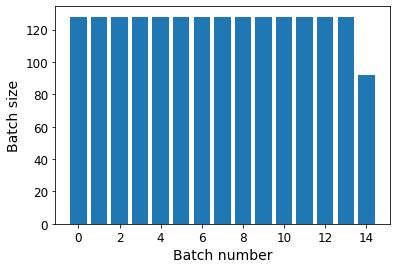

In [ ]:
# Repeat 3 Times and then Batch per 128 Data
titanic_batches = titanic_lines.repeat(3).batch(128)

# Visualization of Batch Size
plot_batch_sizes(titanic_batches)

---

If you need clear epoch separation, put `Dataset.batch()` before the repeat.

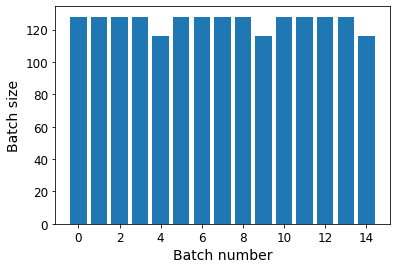

In [ ]:
# Batch per 128 Data and then Repeat 3 Times
titanic_batches = titanic_lines.batch(128).repeat(3)

# Visualization of Batch Size
plot_batch_sizes(titanic_batches)

---

If you would like to perform a custom computation (e.g. to collect statistics) at the end of each epoch then it's simplest to restart the dataset iteration on each epoch.

In [ ]:
# Define Epoch
epochs = 3

# Batch per 128 Data
dataset = titanic_lines.batch(128)

# Illustration of Batch Size per Epoch
for epoch in range(epochs):
  for batch in dataset:
    print(batch.shape)
  print("End of epoch: ", epoch)

(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  0
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  1
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  2


# B. End-to-End Example

When passing data to the built-in training loops of a model, you should either **use NumPy arrays (if your data is small and fits in memory)** or **`tf.data.Dataset` objects**. For the demonstration, we'll use the **MNIST dataset** as our dataset. We will see how this data is process as NumPy arrays and as `tf.data.Dataset`.

<img src='https://www.researchgate.net/profile/Steven-Young-5/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png' />

---



## Train Dataset as Numpy Arrays

In [ ]:
# Download Dataset; Preprocess; and then Split into Train, Validation, and Test Data

## Download the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

## Convert target class into numbers
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

## Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

## Display the Number of Data
print('x_train - length : ', x_train.shape)
print('x_val - length   : ', x_val.shape)
print('x_test - length  : ', x_test.shape)
print('Total - length   : ', x_train.shape[0] + x_val.shape[0] + x_test.shape[0])

11501568/11490434 [==============================] - 0s 0us/step
x_train - length :  (50000, 784)
x_val - length   :  (10000, 784)
x_test - length  :  (10000, 784)
Total - length   :  70000


In [ ]:
# Define Model's Architecture

inputs = tf.keras.Input(shape=(784,), name="digits")
hidden_1 = tf.keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
hidden_2 = tf.keras.layers.Dense(64, activation="relu", name="dense_2")(hidden_1)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="predictions")(hidden_2)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
# Define Training Configuration (Optimizer, Loss, Metrics)

model.compile(
    # Optimizer
    optimizer=tf.keras.optimizers.RMSprop(),
    
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    
    # List of metrics to monitor
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

---

We call `fit()`, which will train the model by slicing the data into *batches* of size batch_size, and repeatedly iterating over the entire dataset for a given number of epochs.

In [ ]:
# Train

print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    validation_data=(x_val, y_val)
)

Fit model on training data
Epoch 1/2
782/782 [==============================] - 3s 3ms/step - loss: 0.3444 - sparse_categorical_accuracy: 0.9006 - val_loss: 0.1885 - val_sparse_categorical_accuracy: 0.9463
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.1551 - sparse_categorical_accuracy: 0.9532 - val_loss: 0.1406 - val_sparse_categorical_accuracy: 0.9613


The returned `history` object holds a record of the loss values and metric values during training

In [ ]:
# Display History of Training Process

history.history

{'loss': [0.34436196088790894, 0.1550651341676712],
 'sparse_categorical_accuracy': [0.9005600214004517, 0.9531599879264832],
 'val_loss': [0.18846485018730164, 0.1406223028898239],
 'val_sparse_categorical_accuracy': [0.9463000297546387, 0.9613000154495239]}

We evaluate the model on the test data via `evaluate()`

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print('Test - Loss     : ', results[0])
print('Test - Accuracy : ', results[1])
print('')

Evaluate on test data
79/79 [==============================] - 0s 2ms/step - loss: 0.1454 - sparse_categorical_accuracy: 0.9593
Test - Loss     :  0.1454155445098877
Test - Accuracy :  0.9592999815940857



## Train Dataset as `tf.data.Dataset`

In the above code, you've seen how to handle losses, metrics, and optimizers, and you've seen how to use the `validation_data` and `validation_split` arguments in `fit()`, when your data is passed as NumPy arrays.

Let's now take a look at the case where your data comes in the form of a `tf.data.Dataset` object.

The `tf.data `API is a set of utilities in TensorFlow 2.0 for loading and preprocessing data in a way that's fast and scalable.

You can pass a Dataset instance directly to the methods `fit()`, `evaluate()`, and `predict()`.

In [ ]:
# Define Model's Architecture

def get_uncompiled_model():
    inputs = tf.keras.Input(shape=(784,), name="digits")
    x = tf.keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
    x = tf.keras.layers.Dense(64, activation="relu", name="dense_2")(x)
    outputs = tf.keras.layers.Dense(10, activation="softmax", name="predictions")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Define Training Configuration (Optimizer, Loss, Metrics)
def get_compiled_model():
    model = get_uncompiled_model()
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"],
    )
    return model

In [ ]:
# Train Program

## First, let's create a training Dataset instance. For the sake of our example, we'll use the same MNIST data as before.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

## Shuffle and slice train dataset.
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

## Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(64)

## Call model to be compiled
model = get_compiled_model()

## Since the dataset already takes care of batching, we don't pass a `batch_size` argument.
model.fit(train_dataset, epochs=3)

## Evaluate on a dataset.
print("\nEvaluate on test data")
result = model.evaluate(test_dataset)
print('Test - Loss     : ', results[0])
print('Test - Accuracy : ', result[1])
print('')

Epoch 1/3
782/782 [==============================] - 2s 2ms/step - loss: 0.3404 - sparse_categorical_accuracy: 0.9045
Epoch 2/3
782/782 [==============================] - 2s 2ms/step - loss: 0.1664 - sparse_categorical_accuracy: 0.9507
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.1223 - sparse_categorical_accuracy: 0.9633

Evaluate on test data
157/157 [==============================] - 0s 1ms/step - loss: 0.1267 - sparse_categorical_accuracy: 0.9620
Test - Loss     :  0.1454155445098877
Test - Accuracy :  0.9620000123977661



In [ ]:
# Check How Many Batch Groups

print('Number of Batch - Train : ', tf.data.experimental.cardinality(train_dataset).numpy())
print('Number of Batch - Test  : ', tf.data.experimental.cardinality(test_dataset).numpy())

Number of Batch - Train :  782
Number of Batch - Test  :  157


---

Note that the Dataset is reset at the end of each epoch, so it can be reused of the next epoch.

If you want to run training only on a specific number of batches from this Dataset, you can pass the `steps_per_epoch` argument, which specifies how many training steps the model should run using this Dataset before moving on to the next epoch.

If you do this, the dataset is not reset at the end of each epoch, instead we just keep drawing the next batches. The dataset will eventually run out of data (unless it is an infinitely-looping dataset).

In [ ]:
# Train ANN with `steps_per_epoch`

## Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

## Call model to be compiled
model = get_compiled_model()

## Only use the 100 batches per epoch (that is 64 * 100 = 6400 samples)
model.fit(train_dataset, epochs=3, steps_per_epoch=100)

## Evaluate on a dataset.
print("\nEvaluate on test data")
result = model.evaluate(test_dataset)
print('Test - Loss     : ', results[0])
print('Test - Accuracy : ', result[1])
print('')

Epoch 1/3
100/100 [==============================] - 1s 3ms/step - loss: 0.7845 - sparse_categorical_accuracy: 0.7969
Epoch 2/3
100/100 [==============================] - 0s 3ms/step - loss: 0.3811 - sparse_categorical_accuracy: 0.8889
Epoch 3/3
100/100 [==============================] - 0s 3ms/step - loss: 0.3218 - sparse_categorical_accuracy: 0.9078

Evaluate on test data
157/157 [==============================] - 0s 2ms/step - loss: 0.2948 - sparse_categorical_accuracy: 0.9142
Test - Loss     :  0.1454155445098877
Test - Accuracy :  0.9142000079154968



---

You can pass a Dataset instance as the `validation_data` argument in `fit()`.

In [ ]:
# Train ANN with Validation Data

## Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

## Call model to be compiled
model = get_compiled_model()

## Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)

## Train with validation data
model.fit(train_dataset, epochs=3, validation_data=val_dataset)

## Evaluate on a dataset.
print("\nEvaluate on test data")
result = model.evaluate(test_dataset)
print('Test - Loss     : ', results[0])
print('Test - Accuracy : ', result[1])
print('')

Epoch 1/3
782/782 [==============================] - 3s 3ms/step - loss: 0.3417 - sparse_categorical_accuracy: 0.9026 - val_loss: 0.1886 - val_sparse_categorical_accuracy: 0.9485
Epoch 2/3
782/782 [==============================] - 2s 3ms/step - loss: 0.1633 - sparse_categorical_accuracy: 0.9520 - val_loss: 0.1421 - val_sparse_categorical_accuracy: 0.9597
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.1166 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.1378 - val_sparse_categorical_accuracy: 0.9593

Evaluate on test data
157/157 [==============================] - 0s 1ms/step - loss: 0.1354 - sparse_categorical_accuracy: 0.9590
Test - Loss     :  0.1454155445098877
Test - Accuracy :  0.9589999914169312



# C. TensorFlow Datasets


TensorFlow Datasets is a collection of datasets ready to use, with TensorFlow or other Python ML frameworks, such as Jax. All datasets are exposed as `tf.data.Datasets`, enabling easy-to-use and high-performance input pipelines.


TensorFlow Datasets exists in two packages:
* The stable version, released every few months : `$ pip install tensorflow-datasets`
* Released every day, contains the last versions of the datasets : `pip install tfds-nightly`


To use TensorFlow Datasets, you can use syntax : `$ import tensorflow_datasets as tfds`

For more details about TensorFlow Datasets, please visits : [Tensorflow](https://www.tensorflow.org/datasets/), [knowyourdata](https://knowyourdata.withgoogle.com/).

---


In [ ]:
import tensorflow_datasets as tfds

datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# If You Want to Know Catalog of Datasets (you can visit https://www.tensorflow.org/datasets/catalog/overview)
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'emnist', 'eraser_multi_r

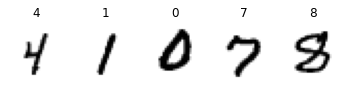

In [ ]:
# Display First 5 Data from First Batch

plt.figure(figsize=(6,3))
mnist_train = mnist_train.repeat(5).batch(32).prefetch(1)
for item in mnist_train:
    images = item["image"]
    labels = item["label"]
    for index in range(5):
        plt.subplot(1, 5, index + 1)
        image = images[index, ..., 0]
        label = labels[index].numpy()
        plt.imshow(image, cmap="binary")
        plt.title(label)
        plt.axis("off")
    break

In [ ]:
# Display All Labels from First Batch

datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]
mnist_train = mnist_train.repeat(5).batch(32)
mnist_train = mnist_train.map(lambda items: (items["image"], items["label"]))
mnist_train = mnist_train.prefetch(1)
for images, labels in mnist_train.take(1):
    print(images.shape)
    print(labels.numpy())

(32, 28, 28, 1)
[4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]


In [ ]:
# Set Random Seed and Clear Session

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Train Model

datasets = tfds.load(name="mnist", batch_size=32, as_supervised=True)
mnist_train = datasets["train"].prefetch(1)
model = keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28, 1]),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255),
    tf.keras.layers.Lambda(lambda images: tf.cast(images, tf.float32)),
    tf.keras.layers.Dense(10, activation="softmax")])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
model.fit(mnist_train, epochs=5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6563 - accuracy: 0.5889
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0425 - accuracy: 0.7983
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8279 - accuracy: 0.8264
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7198 - accuracy: 0.8400
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6536 - accuracy: 0.8488


For more info about preprocessing in keras, please visits : [keras.layers.experimental.preprocessing](www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing)

---

# D. TensorFlow Hub

TensorFlow Hub is a repository of trained machine learning models ready for fine-tuning and deployable anywhere. Reuse trained models like BERT and Faster R-CNN with just a few lines of code.

In [ ]:
# Set Random Seed
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Let's Use One of The Model

import tensorflow_hub as hub

hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1",
                           output_shape=[50], input_shape=[], dtype=tf.string)

model = keras.Sequential()
model.add(hub_layer)
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 833
Non-trainable params: 48,190,600
_________________________________________________________________


In [ ]:
sentences = tf.constant(["It was a great movie", "The actors were amazing"])
embeddings = hub_layer(sentences)

print(sentences)
print(embeddings)

tf.Tensor([b'It was a great movie' b'The actors were amazing'], shape=(2,), dtype=string)
tf.Tensor(
[[ 7.45939985e-02  2.76720114e-02  9.38646123e-02  1.25124469e-01
   5.40293928e-04 -1.09435350e-01  1.34755149e-01 -9.57818255e-02
  -1.85177118e-01 -1.69703495e-02  1.75612606e-02 -9.06603858e-02
   1.12110220e-01  1.04646273e-01  3.87700424e-02 -7.71859884e-02
  -3.12189370e-01  6.99466765e-02 -4.88970093e-02 -2.99049795e-01
   1.31183028e-01 -2.12630898e-01  6.96169436e-02  1.63592950e-01
   1.05169769e-02  7.79720694e-02 -2.55230188e-01 -1.80790052e-01
   2.93739915e-01  1.62875261e-02 -2.80566931e-01  1.60284728e-01
   9.87277832e-03  8.44555616e-04  8.39456245e-02  3.24002892e-01
   1.53253034e-01 -3.01048346e-02  8.94618109e-02 -2.39153411e-02
  -1.50188789e-01 -1.81733668e-02 -1.20483577e-01  1.32937476e-01
  -3.35325629e-01 -1.46504581e-01 -1.25251599e-02 -1.64428815e-01
  -7.00765476e-02  3.60923223e-02]
 [-1.56998575e-01  4.24599349e-02 -5.57703003e-02 -8.08446854e-03
   1.2

# E. End-to-End Example - Using Pandas & Tensorflow

This tutorial provides examples of how to load pandas DataFrames into TensorFlow.

You will use a small heart disease dataset provided by the UCI Machine Learning Repository. There are several hundred rows in the CSV. Each row describes a patient, and each column describes an attribute. You will use this information to predict whether a patient has heart disease, which is a binary classification task.



SOURCE : https://www.tensorflow.org/tutorials/load_data/pandas_dataframe#read_data_using_pandas

## Read data using pandas

In [ ]:
# Setup Libraries

import pandas as pd
import tensorflow as tf

SHUFFLE_BUFFER = 500
BATCH_SIZE = 2

In [ ]:
# Download CSV file containing the heart disease dataset

csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

24576/13273 [=======================================================] - 0s 0us/step


In [ ]:
# Read CSV file using pandas

df = pd.read_csv(csv_file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [ ]:
# Check Data

df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  ...  oldpeak  slope  ca        thal  target
0     63    1   1       145   233  ...      2.3      3   0       fixed       0
1     67    1   4       160   286  ...      1.5      2   3      normal       1
2     67    1   4       120   229  ...      2.6      2   2  reversible       0
3     37    1   3       130   250  ...      3.5      3   0      normal       0
4     41    0   2       130   204  ...      1.4      1   0      normal       0
..   ...  ...  ..       ...   ...  ...      ...    ...  ..         ...     ...
298   52    1   1       118   186  ...      0.0      2   0       fixed       0
299   43    0   4       132   341  ...      3.0      2   0  reversible       1
300   65    1   4       135   254  ...      2.8      2   1  reversible       1
301   48    1   4       130   256  ...      0.0      1   2  reversible       1
302   63    0   4       150   407  ...      4.0      2   3  reversible       1

[303 rows x 14 colu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [ ]:
# Remove target from dataset

target = df.pop('target')

In [ ]:
numeric_feature_names = ['age', 'thalach', 'trestbps',  'chol', 'oldpeak']
numeric_features = df[numeric_feature_names]
numeric_features.head()

,age,thalach,trestbps,chol,oldpeak
0,63,150,145,233,2.3
1,67,108,160,286,1.5
2,67,129,120,229,2.6
3,37,187,130,250,3.5
4,41,172,130,204,1.4


---
This code below is show that Numpy array can be converted into Tf.Tesnsor but not tf.data

In [ ]:
tf.convert_to_tensor(numeric_features)

<tf.Tensor: shape=(303, 5), dtype=float64, numpy=
array([[ 63. , 150. , 145. , 233. ,   2.3],
       [ 67. , 108. , 160. , 286. ,   1.5],
       [ 67. , 129. , 120. , 229. ,   2.6],
       ...,
       [ 65. , 127. , 135. , 254. ,   2.8],
       [ 48. , 150. , 130. , 256. ,   0. ],
       [ 63. , 154. , 150. , 407. ,   4. ]])>

In general, if an object can be converted to a tensor with tf.convert_to_tensor it can be passed anywhere you can pass a tf.Tensor.

With Model.fit
A DataFrame, interpreted as a single tensor, can be used directly as an argument to the Model.fit method.

Below is an example of training a model on the numeric features of the dataset.

The first step is to normalize the input ranges. Use a tf.keras.layers.Normalization layer for that.

To set the layer's mean and standard-deviation before running it be sure to call the Normalization.adapt method:

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)

Call the layer on the first three rows of the DataFrame to visualize an example of the output from this layer:

In [ ]:
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.93383914,  0.03480718,  0.74578077, -0.2600867 ,  1.0680453 ],
       [ 1.3782105 , -1.7806165 ,  1.5923285 ,  0.7573879 ,  0.38022864],
       [ 1.3782105 , -0.87290466, -0.6651321 , -0.3368772 ,  1.3259765 ]],
      dtype=float32)>

Use the normalization layer as the first layer of a simple model:

In [ ]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

When you pass the DataFrame as the x argument to Model.fit, Keras treats the DataFrame as it would a NumPy array:

In [ ]:
model = get_basic_model()
model.fit(numeric_features, target, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15
152/152 [==============================] - 1s 2ms/step - loss: 0.6200 - accuracy: 0.7294
Epoch 2/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7492
Epoch 3/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7558
Epoch 4/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.7690
Epoch 5/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.7822
Epoch 6/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.7855
Epoch 7/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.7888
Epoch 8/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.7855
Epoch 9/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.7888
Epoch 10/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.7855

---
With tf.data

If you want to apply tf.data transformations to a DataFrame of a uniform dtype, the Dataset.from_tensor_slices method will create a dataset that iterates over the rows of the DataFrame. Each row is initially a vector of values. To train a model, you need (inputs, labels) pairs, so pass (features, labels) and Dataset.from_tensor_slices will return the needed pairs of slices:

In [ ]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((numeric_features, target))

for row in numeric_dataset.take(3):
  print(row)

(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 63. , 150. , 145. , 233. ,   2.3])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 108. , 160. , 286. ,   1.5])>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 129. , 120. , 229. ,   2.6])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [ ]:
numeric_batches = numeric_dataset.shuffle(1000).batch(BATCH_SIZE)

model = get_basic_model()
model.fit(numeric_batches, epochs=15)

Epoch 1/15
152/152 [==============================] - 1s 1ms/step - loss: 0.6181 - accuracy: 0.7261
Epoch 2/15
152/152 [==============================] - 0s 1ms/step - loss: 0.5336 - accuracy: 0.7261
Epoch 3/15
152/152 [==============================] - 0s 1ms/step - loss: 0.4874 - accuracy: 0.7261
Epoch 4/15
152/152 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.7360
Epoch 5/15
152/152 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.7525
Epoch 6/15
152/152 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.7525
Epoch 7/15
152/152 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.7624
Epoch 8/15
152/152 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.7822
Epoch 9/15
152/152 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.7822
Epoch 10/15
152/152 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.7855

# F. End-to-End Example - Dataset from Kaggle

For this exercise, we will train a model from Kaggle dataset and directly connect it to Google Collaboratory without having to download the dataset to a local laptop first. The dataset that will be used in this exercise comes from [Kaggle](https://www.kaggle.com/drgfreeman/rockpaperscissors). 

* Description : This dataset contains images of hand gestures from the Rock-Paper-Scissors game. 

* Contents : The dataset contains a total of 2188 images.
  - Label `Rock` : 726 images
  - Label `Paper` : 710 images 
  - Label `Scissors` : 752 images
  - All image are taken on a green background with relatively consistent ligithing and white balance.

* Format : All images are RGB images of 300 x 200 pixels in `.png` format. The images are separated in three sub-folders named `rock`, `paper`, and `scissors` according to their respective class.

---
## Connecting Kaggle and Google Collaboratory

The first step that must be done before training the model, is to connect Kaggle with Google Collab. 



* **Step 1 : Create Kaggle's token.**
  - Open kaggle.com. 
  - Navigate to your profile. 
  - Click tab `Account`.
  - In the section `API`, click `Create New API Token`. There will be a file named `kaggle,.json` which will be downloaded automatically to your local computer.
  - <img src='https://editor.analyticsvidhya.com/uploads/82084ds.PNG'>
* **Step 2 : Install Kaggle library in Google Collaboratory.**
  - Install Kaggle library : *`!pip install kaggle`*.
  - Make a directory named `.kaggle` : *`!mkdir ~/.kaggle`*.
  - Copy the `kaggle.json` into this new directory : *`!cp kaggle.json ~/.kaggle/`*.
  - Change permission for this directory : *`!chmod 600 ~/.kaggle/kaggle.json`*.
* **Step 3 : Download Dataset**
  - For download dataset from a competition : *`!kaggle competition download <competition-name>`*.
  - For download dataset from a ordinary dataset : *`!kaggle datasets download <dataset-name>`*

In [ ]:
# Step 2 : Install Kaggle library in Google Collaboratory.

## Install Kaggle library
!pip install kaggle

## Make a directory named `.kaggle` 
!mkdir ~/.kaggle

## Copy the kaggle.json into this new directory 
!cp kaggle.json ~/.kaggle/

## Change permission for this directory : 
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
%%time 
# Step 3 : Download Dataset
# Source dataset : https://www.kaggle.com/drgfreeman/rockpaperscissors

!kaggle datasets download drgfreeman/rockpaperscissors

 98% 300M/306M [00:04<00:00, 63.9MB/s]
100% 306M/306M [00:04<00:00, 68.5MB/s]
CPU times: user 55.8 ms, sys: 11.5 ms, total: 67.4 ms
Wall time: 5.74 s


In [ ]:
# Every dataset that downloaded from Kaggle, is in format `.zip`. So, we must unzip it before we can using the dataset.

!unzip ./rockpaperscissors.zip

Archive:  ./rockpaperscissors.zip
  inflating: README_rpc-cv-images.txt  
  inflating: paper/04l5I8TqdzF9WDMJ.png  
  inflating: paper/0Og76sl5CJhbxWWx.png  
  inflating: paper/0RA9rcrv8iVvuDDU.png  
  inflating: paper/0Uomd0HvOB33m47I.png  
  inflating: paper/0a3UtNzl5Ll3sq8K.png  
  inflating: paper/0cb6cVL8pkfi4wF6.png  
  inflating: paper/0eqArS2GgsBeqgSn.png  
  inflating: paper/0t08v9bAaA0mXGCQ.png  
  inflating: paper/0vugygEjxQJPr9yz.png  
  inflating: paper/0zKU6wEhT2cDe9j0.png  
  inflating: paper/14K62H4KG1hg5qiJ.png  
  inflating: paper/1Dfw5FRlS4h60JPX.png  
  inflating: paper/1Frbe8cdOdkciOBg.png  
  inflating: paper/1Tt9U9SzrOm98Xtw.png  
  inflating: paper/1fKclJk4eBWOQSR1.png  
  inflating: paper/1jHtb93pI8f6pfKo.png  
  inflating: paper/1oKnUgV2CdCaQUUX.png  
  inflating: paper/1uoW7QcH2qAgCTxv.png  
  inflating: paper/1yKjzquSvl9ShK7K.png  
  inflating: paper/1yeoLbmp4alVOtFv.png  
  inflating: paper/27XFtQjjXQ8AP8Tl.png  
  inflating: paper/2DQbLQfHlfrcATqi.png  
  

As you can feel, even though this dataset is hundreds of MB in size, the process of downloading and extracting images is very fast. This is because we take advantage of the architecture from google.

At this point, we have succesfully connecting between Kaggle and Google Collaboratory.

---
## Explore the Dataset

Let's explore the dataset first before we make a model.

In our tab `Files` in left side, you can see there are bunch of files.

<img src='https://lh3.googleusercontent.com/Xv7cHLve8s_zIbqk509hQ7jKUK0Eyy8_37to2cDHKvDSOD7E9bNak1PCEIHEJeAf2DzYCxh2u69eHFYTQZQ=w3360-h1720'/>

From this dataset, we can see there are new folders and files : 
* `paper`, 
* `rock`, 
* `scissors`, 
* `rps-cv-images`, 
* `README_rpc-cv-images.txt`, and 
* `rockpaperscissors.zip`. 

The contents of folders `paper`, `rock`, and `scissors` is same with contents from `rps-cv-images`. **So, we will be focusing on folder `rps-cv-images`.**


In [ ]:
# Lets check how many data we've got

## Import library `pathlib` to convert string into path
import pathlib

## Define path
dataset_path = '/content/rps-cv-images/'
rock_path = '/content/rps-cv-images/rock/'
paper_path = '/content/rps-cv-images/paper/'
scissor_path = '/content/rps-cv-images/scissors/'

dataset_path = pathlib.Path(dataset_path)
rock_path = pathlib.Path(rock_path)
paper_path = pathlib.Path(paper_path)
scissor_path = pathlib.Path(scissor_path)

## Display images count
total_images = len(list(dataset_path.glob('*/*.png')))
rock_images = list(rock_path.glob('*.png'))
paper_images = list(paper_path.glob('*.png'))
scissor_images = list(scissor_path.glob('*.png'))

print('Total all images     : ', total_images)
print('Total rock images    : ', len(rock_images))
print('Total paper images   : ', len(paper_images))
print('Total scissor images : ', len(scissor_images))

Total all images     :  2188
Total rock images    :  726
Total paper images   :  712
Total scissor images :  750


Let's see 5 first images from each class.

Class :  rock


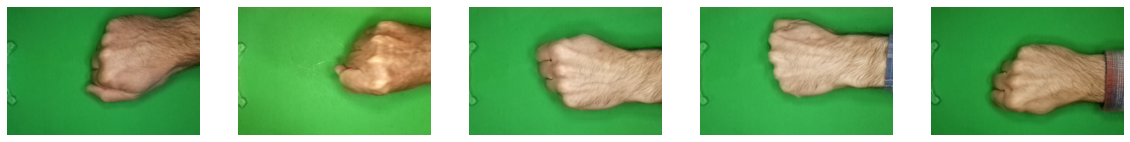

Class :  paper


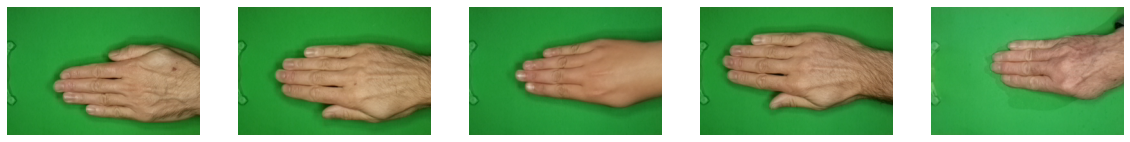

Class :  scissor


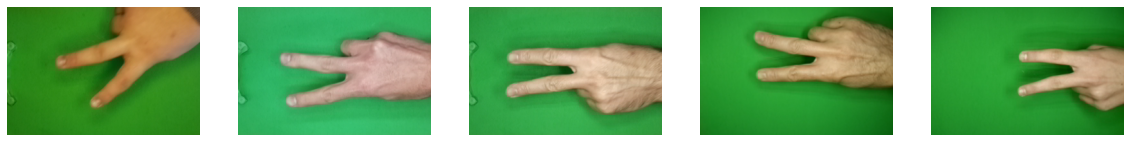

In [ ]:
# Visualization of the first 5 images from each class

classes = {
    'rock' : rock_images,
    'paper': paper_images,
    'scissor': scissor_images
}


for cls in classes.keys():
  folder_name = classes[cls]
  fig = plt.figure(figsize=(20, 20))
  columns = 5
  rows = 1
  print('Class : ', cls)
  for index in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, index)
      image = plt.imread(str(folder_name[index]))
      plt.imshow(image)
      plt.axis("off")
  plt.show()

## Create Dataset Object using Keras

To create a `Dataset` object, we can use `tf.keras.utils.image_dataset_from_directory_utility`. 



With `tf.keras.utils.image_dataset_from_directory`, we can use folder name as class name. So, before we create dataset, make sure that in folder `rps-cv-images` only contains folder `rock`, `paper`, and `scissor`.

See : [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) for more details.

In [ ]:
# Check contents of `/content/rps-cv-images`

## import required libraries
import os
import shutil

## List all contents
folders = os.listdir(dataset_path)

# Check contents and remove unrelated contents
for folder_name in folders:
  if folder_name not in ['rock', 'paper', 'scissors']:
    deleted_path = str(dataset_path) + '/' + folder_name
    
    # Delete files
    if os.path.isfile(deleted_path):
      os.remove(deleted_path)
    
    # Delete folders
    else:
      shutil.rmtree(deleted_path)

Define some parameters for the models : :

In [ ]:
# Define parameters

batch_size = 32
img_height = 200
img_width = 300

Split between train-set and validation-set. For this tutorial, let's split dataset into 70% as train-set and 30% as validation-set. 

When you create validation-set, you can use the **same syntax** as train-set. The only difference is in param **`subset`**.

In [ ]:
# Create train set

train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.3,
  subset="training",
  seed=25,
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=batch_size)

Found 2188 files belonging to 3 classes.
Using 1532 files for training.


In [ ]:
# Create validation set

val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=25,
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=batch_size)

Found 2188 files belonging to 3 classes.
Using 437 files for validation.


You can check the class names in the `class_names` attribute on these datasets.

In [ ]:
class_names = train_ds.class_names
print('Class names - train      : ', class_names)

class_names = val_ds.class_names
print('Class names - validation : ', class_names)

Class names - train      :  ['paper', 'rock', 'scissors']
Class names - validation :  ['paper', 'rock', 'scissors']


---
## Configure the dataset for performance

Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

* Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.
* Dataset.prefetch overlaps data preprocessing and model execution while training.

Interested readers can learn more about both methods, as well as how to cache data to disk in the Prefetching section of the Better performance with the tf.data API guide.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

---
## Normalization

Each image in our dataset is a RGB image where each pixel has value between 0-255. For Neural Network, this can lead into overfit or underfit due to this high values. So, we will normalize the input into range 0-1. We will use `tf.keras.layers.Rescaling` to do this.

In [ ]:
# Create layer for normalization/rescaling

inputs = tf.keras.Input(shape=(200,300,3))
norm_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) (inputs)

---
## Train a model

Now, let's create architecture of neural network.

In [ ]:
# Create architecutre of neural network

conv2d_01 = tf.keras.layers.Conv2D(32, (3,3), activation='relu') (norm_layer)
batch_norm_01 = tf.keras.layers.BatchNormalization() (conv2d_01)
max_pool_01 = tf.keras.layers.MaxPooling2D(2, 2) (batch_norm_01)

conv2d_02 = tf.keras.layers.Conv2D(32, (3,3), activation='relu') (max_pool_01)
batch_norm_02 = tf.keras.layers.BatchNormalization() (conv2d_02)
max_pool_02 = tf.keras.layers.MaxPooling2D(2,2) (batch_norm_02)

conv2d_03 = tf.keras.layers.Conv2D(64, (3,3), activation='relu') (max_pool_02)
batch_norm_03 = tf.keras.layers.BatchNormalization() (conv2d_03)
max_pool_03 = tf.keras.layers.MaxPooling2D(2,2) (batch_norm_03)

conv2d_04 = tf.keras.layers.Conv2D(128, (3,3), activation='relu') (max_pool_03)
batch_norm_04 = tf.keras.layers.BatchNormalization() (conv2d_04)
max_pool_04 = tf.keras.layers.MaxPooling2D(2,2) (batch_norm_04)

flatten = tf.keras.layers.Flatten() (max_pool_04)

dense_01 = tf.keras.layers.Dense(64, activation='relu') (flatten)
dropout = tf.keras.layers.Dropout(.3) (dense_01)

outputs = tf.keras.layers.Dense(3, activation='softmax') (dropout)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 300, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 200, 300, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 198, 298, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 198, 298, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 147, 32)       9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 97, 147, 32)       128   

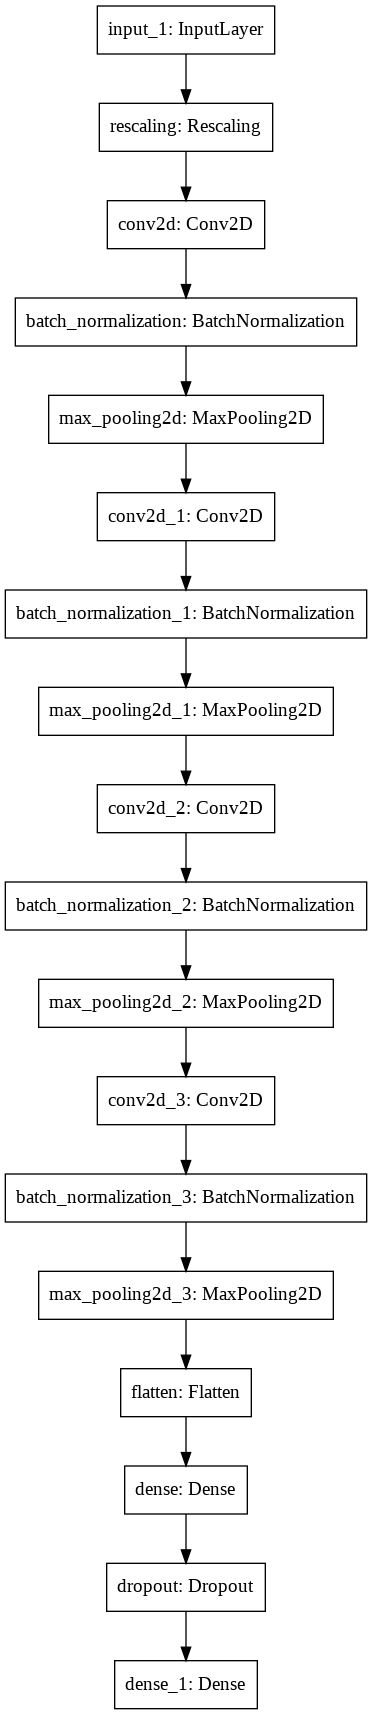

In [ ]:
# Plot diagram of architecture model

tf.keras.utils.plot_model(model, "model_rock_paper_scissor.png")

In [ ]:
# Compile the model

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [ ]:
# Train the model

%%time
cnn_model = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    verbose=1)

Epoch 1/15
48/48 [==============================] - 121s 2s/step - loss: 1.7912 - accuracy: 0.7474 - val_loss: 11.7997 - val_accuracy: 0.3066
Epoch 2/15
48/48 [==============================] - 116s 2s/step - loss: 0.4894 - accuracy: 0.8897 - val_loss: 14.1879 - val_accuracy: 0.3066
Epoch 3/15
48/48 [==============================] - 118s 2s/step - loss: 0.2743 - accuracy: 0.9269 - val_loss: 19.5840 - val_accuracy: 0.3066
Epoch 4/15
48/48 [==============================] - 117s 2s/step - loss: 0.3850 - accuracy: 0.9432 - val_loss: 28.0548 - val_accuracy: 0.3066
Epoch 5/15
48/48 [==============================] - 117s 2s/step - loss: 0.2282 - accuracy: 0.9602 - val_loss: 11.7690 - val_accuracy: 0.3066
Epoch 6/15
48/48 [==============================] - 117s 2s/step - loss: 0.1497 - accuracy: 0.9726 - val_loss: 8.8647 - val_accuracy: 0.3066
Epoch 7/15
48/48 [==============================] - 117s 2s/step - loss: 0.2219 - accuracy: 0.9687 - val_loss: 12.2865 - val_accuracy: 0.3089
Epoch 8

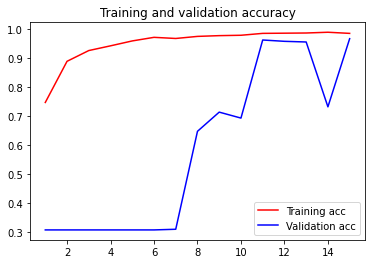

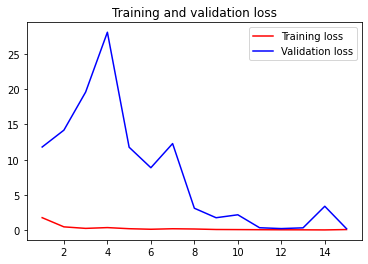

In [ ]:
# Visualize accuracy and loss for train and validation data

acc = cnn_model.history['accuracy']
val_acc = cnn_model.history['val_accuracy']
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()
plt.show()

As you can see, our model can achieve **98% in training** and **96% in validation**.

---
## Test Several Images

Let's try predict several images. We will use these 3 images.

<img src="https://i.ibb.co/58WfNb7/test-default-01.png">
<img src="https://i.ibb.co/XCv78cf/test-default-02.png">
<img src="https://i.ibb.co/jvs4y0w/test-default-03.png">

In [ ]:
# First, download these 3 images

import requests
urls = ['https://i.ibb.co/58WfNb7/test-default-01.png', 
        'https://i.ibb.co/XCv78cf/test-default-02.png', 
        'https://i.ibb.co/jvs4y0w/test-default-03.png']

for index, url in enumerate(urls):
  response = requests.get(url)
  filename = 'img-test-' + str(index+1) + '.jpg' 
  file = open(filename, "wb")
  file.write(response.content)
  file.close()


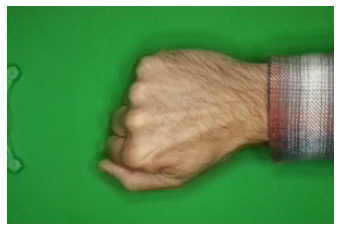

Result     :  [[6.4934795e-18 1.0000000e+00 1.2853277e-32]]
Max Class  :  1
Class Name :  rock



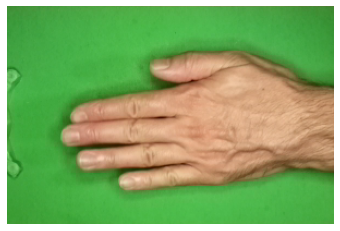

Result     :  [[1.000000e+00 0.000000e+00 7.344608e-35]]
Max Class  :  0
Class Name :  paper



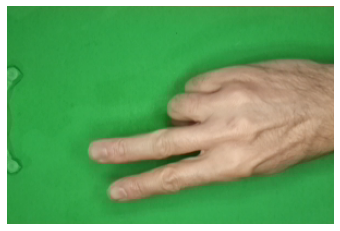

Result     :  [[2.8948333e-02 6.6250396e-09 9.7105163e-01]]
Max Class  :  2
Class Name :  scissors



In [ ]:
# Test Images

from tensorflow.keras.preprocessing import image

img_paths = ['img-test-1.jpg',
             'img-test-2.jpg',
             'img-test-3.jpg',]

for filename in img_paths:
  img = image.load_img(filename, target_size=(img_height, img_width))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)

  prediction = model.predict(img_batch)
  result_max_proba = prediction.argmax(axis=-1)[0]
  result_class = class_names[result_max_proba]

  print('Result     : ', prediction)
  print('Max Class  : ', result_max_proba)
  print('Class Name : ', result_class)
  print('')